# ML WEEK 2 - SHIV PRATAP SINGH 200968038

## EX1

### 1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information

# Title: Pima Indians Diabetes Database
The diagnostic, binary-valued variable investigated is whether the patient shows signs of diabetes according to World Health Organization criteria (i.e., if the 2 hour post-load plasma glucose was at least 200 mg/dl at any survey  examination or if found during routine medical care). The population lives near Phoenix, Arizona, USA. Results: Their ADAP algorithm makes a real-valued prediction between 0 and 1. This was transformed into a binary decision using a cutoff of 0.448. Using 576 training instances, the sensitivity and specificity of their algorithm was 76% on the remaining 192 instances. 

## Relevant Information:
Several constraints were placed on the selection of these instances from a larger database.  In particular, all patients here are females at least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices.  It is a unique algorithm; see the paper for details.

### Number of Instances: 768

### Number of Attributes: 8 plus class 

## For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
   
### Missing Attribute Values: None



## Class Distribution: (class value 1 is interpreted as "tested positive for  diabetes")
 
####    Class Value  Number of instances
         0            500
         1            268
 
## Brief statistical analysis:
 
     Attribute number:    Mean:   Standard Deviation:
      1.                     3.8     3.4
      2.                   120.9    32.0
      3.                    69.1    19.4
      4.                    20.5    16.0
      5.                    79.8   115.2
      6.                    32.0     7.9
      7.                     0.5     0.3
      8.                    33.2    11.8

### Relabeled values in attribute 'class'
    From: 0                       To: tested_negative     
    From: 1                       To: tested_positive     

#### @relation pima_diabetes
#### @attribute 'preg' real
#### @attribute 'plas' real
#### @attribute 'pres' real
#### @attribute 'skin' real
#### @attribute 'insu' real
#### @attribute 'mass' real
#### @attribute 'pedi' real
#### @attribute 'age' real
#### @attribute 'class' { tested_negative, tested_positive}
 

In [43]:
# Read  data
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes.csv',header=None)
df.columns = ['preg','plas','pres','skin','insu','mass','pedi','age','class']
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [44]:
df[['plas', 'pres', 'skin', 'insu', 'mass']] = df[['plas', 'pres', 'skin', 'insu', 'mass']].replace(0,np.nan)
df.isnull().sum()

preg       0
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [45]:
df = df.fillna(method = 'ffill')
df = df.fillna(method = 'bfill')
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [46]:
def c(t):
    if t == 'tested_negative':
        return 0
    else:
        return 1

In [47]:
df['class'] = df['class'].apply(c)

In [48]:
df['class']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

### 2. Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [49]:
print(f'The mean of age attribute {df.age.mean()} and standard deviation {df.age.std()}')

The mean of age attribute 33.240885416666664 and standard deviation 11.76023154067868


<AxesSubplot:>

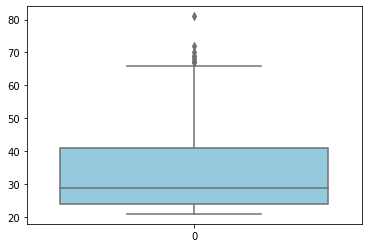

In [50]:
import seaborn as sns
sns.boxplot(data = df.age,color='skyblue')

<AxesSubplot:xlabel='age', ylabel='Density'>

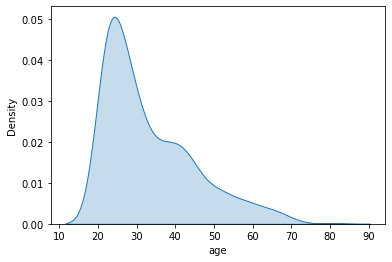

In [51]:
sns.kdeplot(df.age,shade=True)

We observe outliers in age, so to deal with all outliers 

In [52]:
def ap(p):
    upper = p.quantile(0.75)
    lower = p.quantile(0.25)
    iqr =upper - lower
    # df.loc[df[numeric]>=df[numeric].quantile(0.75)+iqr*1.5]
    factor=iqr*1.5
    cond = (p>=upper+factor) | (p<=lower-factor)
    p.loc[cond] = p.median()
    return p

In [53]:
df[['preg','plas','pres','skin','insu','mass','pedi','age']]=df[['preg','plas','pres','skin','insu','mass','pedi','age']].apply(ap)

<AxesSubplot:>

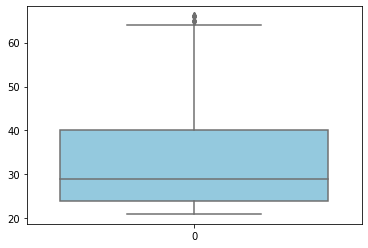

In [54]:
sns.boxplot(data = df.age,color='skyblue')#Clearly outliers have been dealt with

### 3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class

<AxesSubplot:xlabel='class', ylabel='age'>

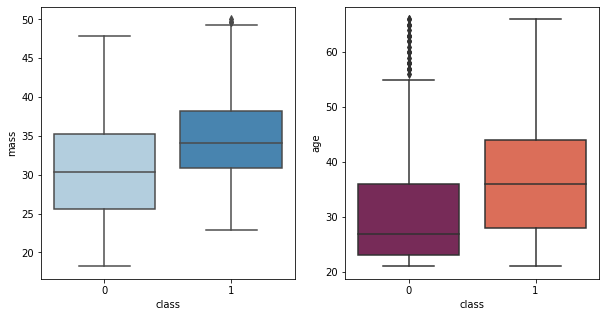

In [55]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(data = df,x='class',y='mass',palette="Blues",ax=axes[0])
sns.boxplot(data = df,x='class',y='age',palette="rocket",ax=axes[1])

In [56]:
pd.crosstab(index = df['class'],columns =df.age)

age,21,22,23,24,25,26,27,28,29,30,...,57,58,59,60,61,62,63,64,65,66
class,,,,,,,,,,,,,,,,,,,,,
0,58,61,31,38,34,25,24,25,23,15,...,4,4,1,3,1,2,4,1,3,2
1,5,11,7,8,14,8,8,10,15,6,...,1,3,2,2,1,2,0,0,0,2


In [58]:
pd.crosstab(index = df['class'],columns =df.mass)

mass,18.2,18.4,19.1,19.3,19.4,19.5,19.6,19.9,20.0,20.1,...,46.5,46.7,46.8,47.9,48.3,48.8,49.3,49.6,49.7,50.0
class,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,1,2,3,1,1,1,...,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


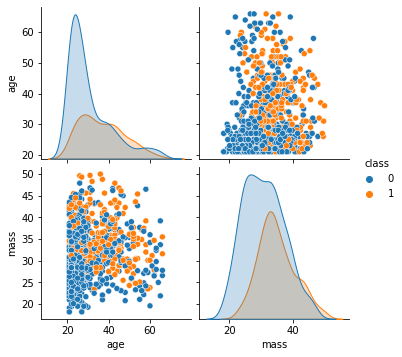

In [60]:
sns.pairplot(df[['age', 'mass', 'class']], hue = 'class')

### 4. Tabulate the class label and comment on whether the classes are balanced.


In [61]:
df.groupby('class').count()

,preg,plas,pres,skin,insu,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


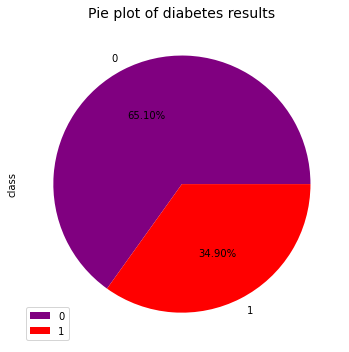

In [62]:
import matplotlib.pyplot as plt
df['class'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(5,5),colors=['purple','red'])
plt.title("Pie plot of diabetes results", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

Classes are skewed towards not tested positively

### 5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn

In [63]:
from sklearn.preprocessing import MinMaxScaler
x = df[['preg','plas','pres','skin','insu','mass','pedi','age']]
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x
y=df['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred = model.predict(x_test)
print(f'The Model performance on test set = {model.score(x_test,y_test)}')
print(f'The Model F1 Score == {f1_score(y_pred, y_test)}')


The Model performance on test set = 0.7316017316017316
The Model F1 Score == 0.5974025974025973


### 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

<AxesSubplot:>

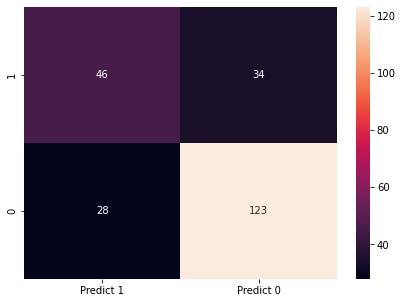

In [65]:
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

Here we can see that the model is predicting correctly for tested_negative class and works good enough for tested_positive. There are however large missclassification errors - False Negatives. Accuracy of 62.40% for an untuned Log Reg is good enough.

### 7. Compute accuracy rate, true positive and true negative rate and comment on the performance.


In [69]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,labels = [0,1]))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



### Q8

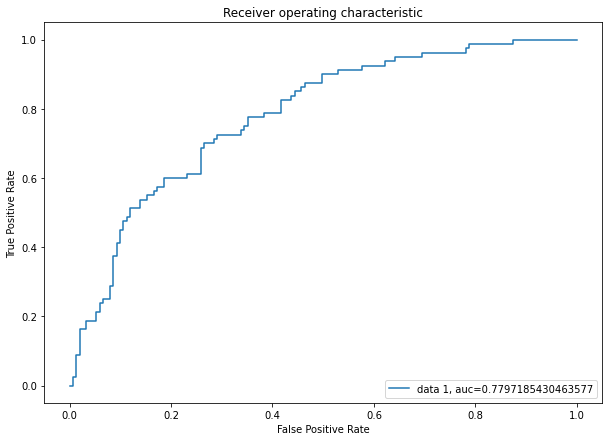

In [70]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## EX2

### 1. For the IRIS data set write down the meta information

## Title: Iris Plants Database


### 4. Relevant Information:
   --- This is perhaps the best known database to be found in the pattern
       recognition literature.  Fisher's paper is a classic in the field
       and is referenced frequently to this day.  (See Duda & Hart, for
        example.)  The data set contains 3 classes of 50 instances each,
        where each class refers to a type of iris plant.  One class is
        linearly separable from the other 2; the latter are NOT linearly
        separable from each other.
    --- Predicted attribute: class of iris plant.
    --- This is an exceedingly simple domain.
 
### 5. Number of Instances: 150 (50 in each of three classes)
 
### 6. Number of Attributes: 4 numeric, predictive attributes and the class
 
### 7. Attribute Information:
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
    5. class: 
       -- Iris Setosa
       -- Iris Versicolour
       -- Iris Virginica
 
### 8. Missing Attribute Values: None
 
### Summary Statistics:
####  	           Min  Max   Mean    SD   Class Correlation
####    sepal length: 4.3  7.9   5.84  0.83    0.7826   
####     sepal width: 2.0  4.4   3.05  0.43   -0.4194
####    petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
####     petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)

### 9. Class Distribution: 33.3% for each of 3 classes.

#### @RELATION iris

##### @ATTRIBUTE sepallength	REAL
##### @ATTRIBUTE sepalwidth 	REAL
##### @ATTRIBUTE petallength 	REAL
##### @ATTRIBUTE petalwidth	REAL
##### @ATTRIBUTE class 	{Iris-setosa,Iris-versicolor,Iris-virginica}


In [71]:
df2 = pd.read_csv('Iris.csv').set_index('Id')

df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [72]:
df2.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Deal with outliers

In [106]:
df2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = df2[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(ap)

### 2. Visualize the class label against the predictor variable using appropriate plots

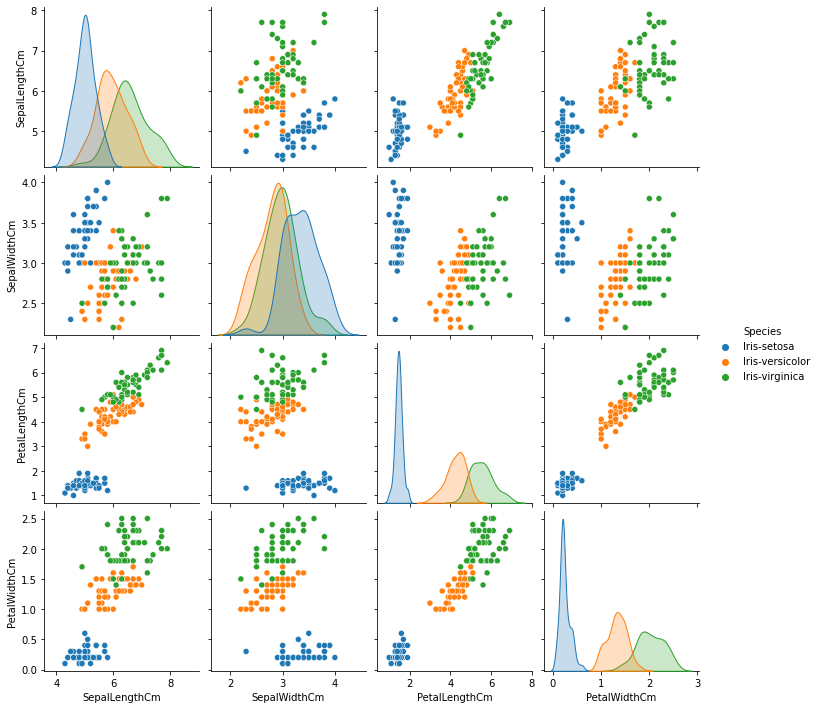

In [107]:
sns.pairplot(df2, hue = 'Species')

### 3. Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label ‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [109]:
x = df2.drop('Species', axis = 1)
y = df2['Species']
X = StandardScaler().fit_transform(x)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=43)

In [111]:
model = LogisticRegression(random_state=42).fit(X_train, y_train)

In [112]:
y_pred = model.predict(X_test)

### 4. Analysis and visualize the performance of the classifier using metrics, confusion matrix .

<AxesSubplot:>

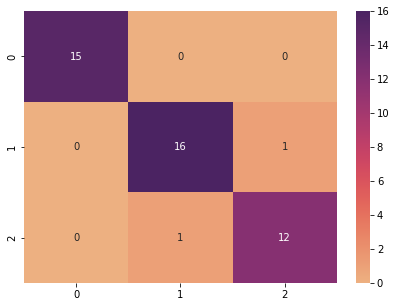

In [113]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap = 'flare')

Confusion matrix gives very encouraging results, missclassifications are considerably low.

In [114]:
print(f'Training set score {model.score(X_train, y_train)}')
print(f'Test Set Score {model.score(X_test,y_test)}')

Training set score 0.9523809523809523
Test Set Score 0.9555555555555556


### 5. Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for k value between 2 and 20. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [120]:
scores = [] #Model Score
error_rate=[] # Error Rate
acc = [] # Accuracy
for i in range (2,21):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    error_rate.append(np.mean(y_pred != y_test))
    acc.append(accuracy_score(y_test, y_pred))
    
# We train knn for all k-values ranging from 2-20 and store the error values, accuracy values and model scores at each iteration


### 6. Identify the best k ( for k between 2 and 20) for the model built.

#### Accuracy Graph

Maximum accuracy:- 1.0 at K = 9


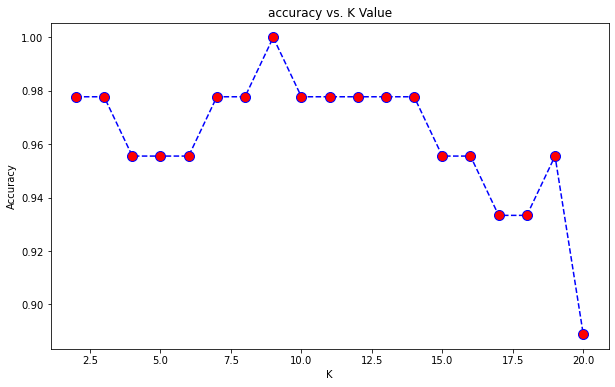

In [121]:
plt.figure(figsize=(10,6))
plt.plot(range(2,21),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+2)


Minimum error:- 0.0 at K = 9


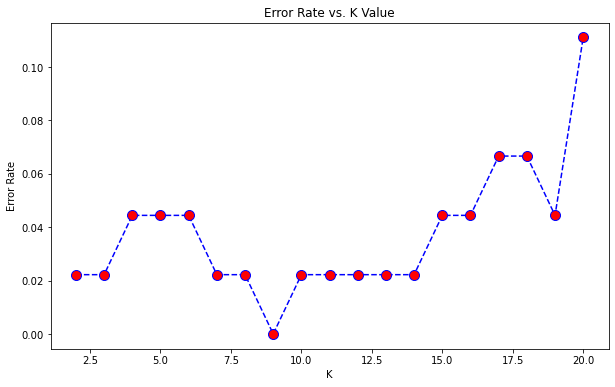

In [122]:
plt.figure(figsize=(10,6))
plt.plot(range(2,21),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+2)


Clearly from the graphs we find the minimum value for error and maximum accuracy at k = 9

Best value wouldnt be a low value of k. The small K value isn’t suitable for classification, Choosing a small value of K leads to unstable decision boundaries.
The substantial K value is better for classification as it leads to smoothening the decision boundaries.

In [123]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)
print(f'Training set score {knn.score(X_train, y_train)}')
print(f'Test Set Score {knn.score(X_test,y_test)}')

Training set score 0.9714285714285714
Test Set Score 1.0


### 7. Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better performance for the IRIS dataset

KNN is a lazy learner so even taking k=9 is computationally more expensive, however it performs admirably with massive test set score = 1. While, both work extremely well, it'd be better to choose an eager learner to reduce the computational burden of computing Euclidean distances to find 9 closest points then making predictions.